# A Numerical Analysis Project of Developing The Optimal Investment Portfolio
Danming Wang (5833587), Xing Su (4502266), Xilin Huang (5562194), Zhixin Liu (7445224), Li Guo (7593601), Wenrui Wang(5813373)

In [24]:
import math
from sympy import *
#create a "symbol" called al (alpha)
al = Symbol('al')
from numpy import log as ln
from tabulate import tabulate
from fractions import Fraction
from sympy.plotting import plot

In [25]:
def upExpr(u1,u2):
    # Expected return mu_p expressed in terms of alpha
    w1=al
    w2=1-al
    up=w1*u1+w2*u2
    return up
    
def varPExpr(var1, var2,cov):
    # Expected variance expressed in terms of alpha
    w1=al
    w2=1-al
    varP=pow(w1,2)*var1+2*w1*w2*cov+pow(w2,2)*var2
    return varP

def Bisection(start, end, f,x):
    # x is the notation of the variable
    f=lambdify(x,f)
    a=start
    b=end
    for i in list(range(0,3)):
        p=Fraction((a+b)/2)
        fa= f(a)
        fb= f(b)
        fp= f(p)
        if fp==0:
            return p
        elif (fp * fa)>0:
            a=p
        elif (fp * fa)<0:
            b=p
    return p

def Newton(p0,pN,tol,f,x):
    df=f.diff(x)
    f = lambdify(x, f)
    df = lambdify(x, df)
    p=Fraction(p0-Fraction(Fraction(f(p0))/Fraction(df(p0))))
    i=1
    while abs(p-p0)>=tol:
        if(p>pN):
            return pN
        p0=p
        p=Fraction(Fraction(p)-Fraction(Fraction(f(p))/Fraction(df(p))))
        i+=1
    p=float(p)
    return p

#### 1(a)

In [49]:
u1=0.03
u2=0.09
up1=0.08
f1a=upExpr(u1,u2)-Fraction(up1)
p01a=Bisection(0,1,f1a,al)
alpha1a=Newton(p01a,1,pow(10,-10),f1a,al)
print("alpha =",alpha1a)

alpha = 0.16666666666666669


When $\mu_p=0.08$, $\alpha=0.16666666$, $w_1=\alpha=0.16666666,\ w_2=1-\alpha=0.83333333$.

In [56]:
cov1=-0.02
sig1=0.2 #sd1
sig2=0.4 #sd2
fvarP1=varPExpr(pow(sig1,2),pow(sig2,2),cov1)
varP1=lambdify(al,fvarP1)
varp1=varP1(alpha1a)
sdp1=sqrt(varp1)
print(varp1,sdp1)

0.10666666666666665 0.326598632371090


The variance $\sigma_p^2$ of the portfolio is $0.10666666$. The standard deviation is $0.3265986$.

In [51]:
t=Symbol('t')
def V1(w,up,sdp):
    V1t=w*pow(math.e,up*t-sdp*sqrt(t))
    return V1t

def V2(w,up,sdp):
    V2t=w*pow(math.e,up*t+sdp*sqrt(t))
    return V2t

def plotV(v1t,v2t):
    p1=plot(v1t,(t,0,1),show=False)
    p2=plot(v2t,(t,0,1),show=False)
    p1.extend(p2)
    p1.show()
    v1t=lambdify(t,v1t)
    v2t=lambdify(t,v2t)
    print("v1t(1) =",v1t(1),"\nv2t(1) =",v2t(1))

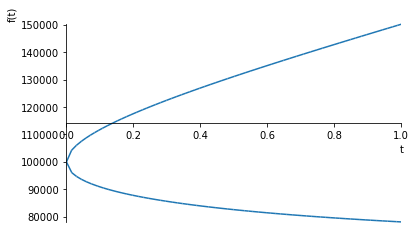

v1t(1) = 78145.4281047113 
v2t(1) = 150170.12504165436


In [52]:
w=100000
v1t=V1(w,up1,sdp1)
v2t=V2(w,up1,sdp1)
plotV(v1t,v2t)

In [53]:
# In bank with a continuous compounding rate of 4% 
bank=w*pow(1+0.04/12,12)
print(bank)

104074.15429197907


Putting $w=100,000$ in a bank acount for 1 year will return $104074.15$.
<br>
Investing $w=100,000$ in the portfolio may return $78145.43$ to $150170.13$.

#### 1(b)

In [54]:
dfvarP1=fvarP1.diff(al) #minimize variance when df=0
a00=Bisection(0,1,dfvarP1,al)
alpha1b=Newton(a00,1,pow(10,-10),dfvarP1,al)
print("alpha =",alpha1b)
upal=upExpr(u1,u2)
upal=lambdify(al,upal)
up1b=upal(alpha1b)
print("up =",up1b)

alpha = 0.75
up = 0.045


The optimal value of $\alpha = 0.75$. And $w_1=\alpha=0.75,\ w2=1-\alpha=0.25,\ \mu_p=0.045$.

Variance = 0.025


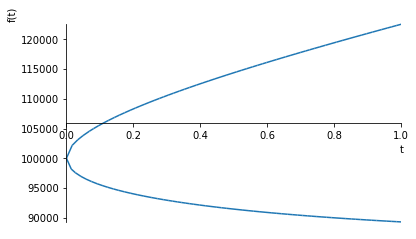

v1t(1) = 89304.89512234372 
v2t(1) = 122521.19911302069


In [55]:
var1b=varP1(alpha1b)
sd1b=sqrt(var1b)
V1t1b=V1(w,up1b,sd1b)
V2t1b=V2(w,up1b,sd1b)
print("Variance =",var1b)
plotV(V1t1b,V2t1b)

# sd < min{sig1,sig2}

Investing $w=100,000$ in the portfolio may return $89304.90$ to $122521.20$ in 1 year.

#### 2(a)

In [33]:
u1=0.0005*pow(math.e,3*al)
u2=0.07
up2=0.05
f2a=upExpr(u1,u2)-Fraction(up2)
p02a=Bisection(0,1,f2a,al)
alpha2a=Newton(p02a,1,pow(10,-10),f2a,al)
print("alpha =",alpha2a,", 1-alpha =", 1-alpha2a)

alpha = 0.2906803254012495 , 1-alpha = 0.7093196745987504


When $\mu_p=0.05$, $\alpha=0.290680325$, $w_1=\alpha=0.290680325,\ w_2=1-\alpha=0.709319675$.

In [34]:
cov2=-0.01  #covarience
var1=pow(math.e,-3*al)  #sigma
var2=0.4
fvarP2=varPExpr(var1,var2,cov2)
varP2=lambdify(al,fvarP2)
varp2=varP2(alpha2a)
sdp2=sqrt(varp2)
print(varp2,sdp2)
var1=lambdify(al,var1)
print("Riskiness of asset 1 is:", var1(alpha2a))

0.23245721207741235 0.482138166999266
Riskiness of asset 1 is: 0.4180973511006655


The variance $\sigma_p^2$ of the portfolio is $0.23245721$. The standard deviation is $0.48213816$.

0.646604478101309
0.632455532033676


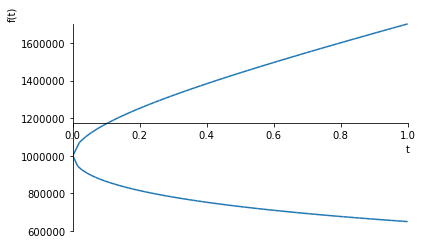

v1t(1) = 649119.6835701319 
v2t(1) = 1702568.7959379887

Putting in bank 1040741.5429197906


In [35]:
w=1000000
print(sqrt(pow(math.e,-3*alpha2a)))  #sd1
print(sqrt(0.4))  #sd2
v1t=V1(w,up2,sdp2)
v2t=V2(w,up2,sdp2)
plotV(v1t,v2t)
# In bank with a continuous compounding rate of 4% 
bank=w*pow(1+0.04/12,12)
print("\nPutting in bank",bank)

Putting $w=1,000,000$ in a bank acount for 1 year will return $1040741.54$.
<br>
Investing $w=1,000,000$ in the portfolio may return $649119.68$ to $1702568.80$ in 1 year.

#### 2(b)

In [40]:
dfvarP2=fvarP2.diff(al) #minimize variance 
a0=Bisection(-1,1,dfvarP2,al)
alpha2b=Newton(a0,1,pow(10,-10),dfvarP2,al)
print("alpha =",float(alpha2b), "1-alpha =",1-alpha2b)
upal=upExpr(u1,u2)
upal=lambdify(al,upal)
up2b=upal(alpha2b)
print("up =",up2b)

alpha = 1.0 1-alpha = 0
up = 0.010042768461593889


The optimal value is $\alpha = 1$. And $w_1=\alpha=1,\ w2=1-\alpha=0,\ \mu_p=0.01004277$.

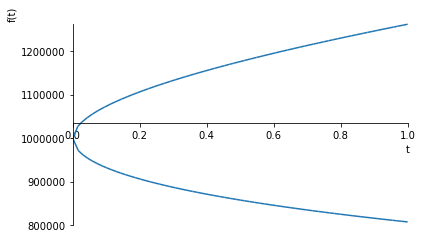

v1t(1) = 808085.5141744089 
v2t(1) = 1262599.8000782086
var = 0.04978706836786368 sd= 0.223130160148429
Riskiness of asset 1 is: 0.04978706836786368


In [37]:
var2b=varP2(alpha2b)
sd2b=sqrt(var2b)
V1t2b=V1(w,up2b,sd2b)
V2t2b=V2(w,up2b,sd2b)
plotV(V1t2b,V2t2b)
print("var =",varP2(alpha2b),"sd=",sqrt(varP2(alpha2b)))
print("Riskiness of asset 1 is:", var1(alpha2b))
# sd < min{sig1,sig2}

Investing $w=1,000,000$ in the portfolio may return $808085.51$ to $1262599.80$ in 1 year.